In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interp2d

In [82]:
def get_intercept(x, arr):
    return np.argmin(np.abs(x - arr))

def parabola(x, p0, p1, p2):
    return p2*(x)**2 + p1*(x) + p0

In [83]:
dx = 0.05
n_air = 1.0003

l = 100
h = 50
y_min = -h/2
y_max = h/2
x_min = 0
x_max = l

dx_points = np.linspace(x_min, x_max, int((x_max - x_min) / dx))
dy_points = np.linspace(y_min, y_max, int((y_max - y_min) / dx))

# Refractive index at every point in the world
n = n_air * np.ones((dx_points.shape[0],dy_points.shape[0]))

# Coordinates at every point in the world
world_x, world_y = np.meshgrid(dx_points, dy_points, indexing="ij")


def set_radiator(y, xmin, xmax, nvalues):
    for i in range(len(xmin)):
        iy = get_intercept(y[i], dy_points)
        imin = get_intercept(xmin[i], dx_points)
        imax = get_intercept(xmax[i], dx_points)
        n[imin:imax, iy] = nvalues[i]
        
        
def precalculate():
    # Postive x-direction
    deln_x = n[:-1,:] / n[1:,:] # Current / Next
    deln_x_interp = interp2d((world_x[1:,:], world_y[1:,:]), deln_x)
    # Negative y-direction
    deln_yn = n[:,1:] / n[:,:-1] 
    deln_x_interp = interp1d(x, y)

    # Positive y-direction
    self.deln_yp = self.n[:,:-1] / self.n[:,1:]


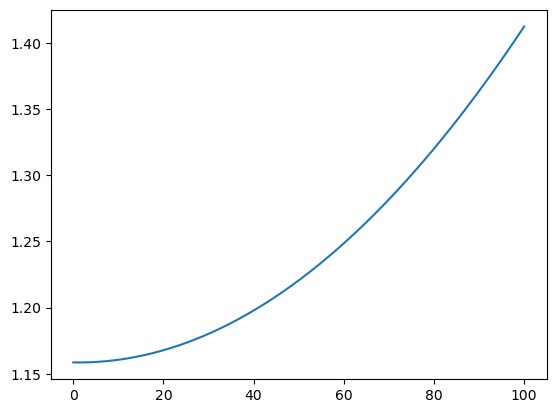

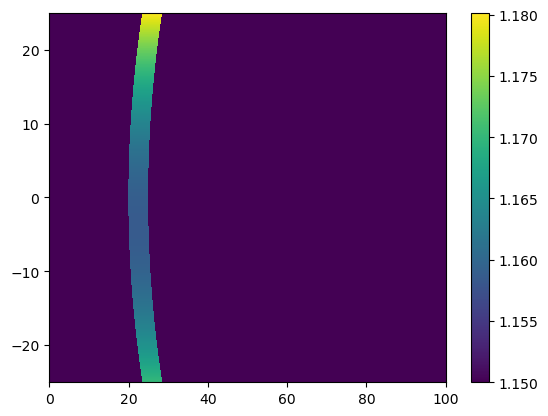

In [84]:
params_tile = [20, -5.83882672e-04,  5.59534706e-03]
xmin = parabola(dy_points, *params_tile)
xmax = xmin + 5

# Set up a Y gradient
params = [1.15855784e+00, -5.83882672e-05,  2.59534706e-05]
# params = [1.15855784e+00, 0,  0]
plt.plot(dx_points, parabola(dx_points, *params))
plt.show()

n_values = parabola(dy_points+5, *params)


set_radiator(dy_points, xmin, xmax, n_values)
plt.pcolormesh(world_x, world_y, n, vmin=1.15)
plt.colorbar()



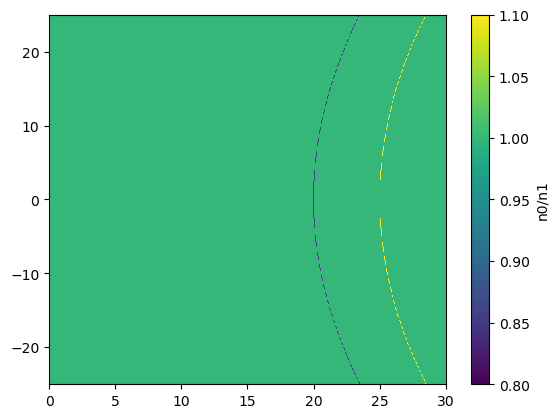

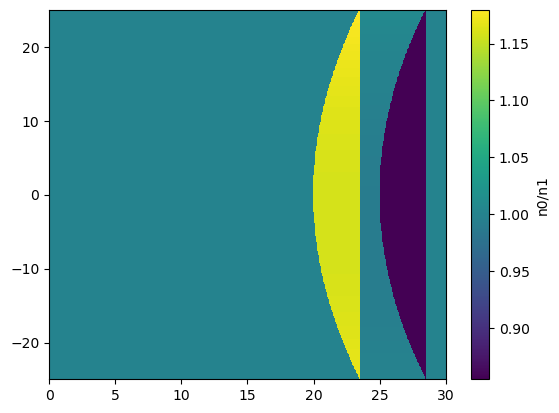

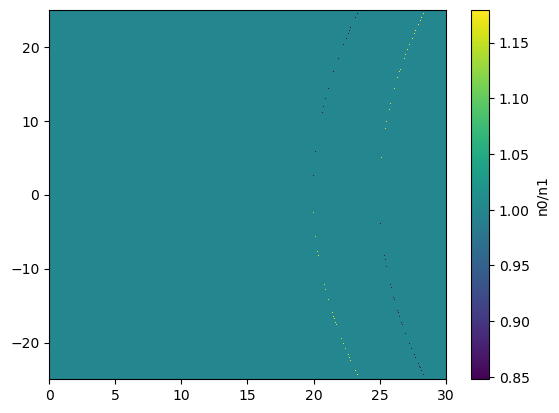

0.8478086498942171
1.1795859768103425


In [85]:
deln_x = n[:-1,:] / n[1:,:] # Current / Next

deln_yp = n[:,:-1] / n[:,:1]
deln_yn = n[:,1:] / n[:,:-1]

plt.pcolormesh(world_x[1:,:], world_y[1:,:], deln_x, vmin = 0.8, vmax = 1.1)
# plt.axvline(100,ls = ":")
# plt.axvline(120,ls = ":")
plt.colorbar(label = "n0/n1")
plt.xlim(0,30)
plt.show()


plt.pcolormesh(world_x[:,1:], world_y[:,1:], deln_yp)
plt.colorbar(label = "n0/n1")
plt.xlim(0,30)
plt.show()

plt.pcolormesh(world_x[:,1:], world_y[:,1:], deln_yn)
plt.colorbar(label = "n0/n1")
plt.xlim(0,30)
plt.show()

print (deln_yn.min())
print (deln_yn.max())

In [117]:
tracky = np.zeros(len(dx_points))
thetay = np.zeros(len(dx_points))
thetay[0] = np.deg2rad(40)
yloc_prev = 0
tracky[0] = 0
for i in range(len(dx_points)-1):
#     print (i)
    yloc = get_intercept(tracky[i],dy_points)
    # Change direction due to y gradient
#     thetay[i+1] = np.arcsin( (n[i,yloc] / n[i,yloc+1]) * np.sin(thetay[i]))
    # Change direction due to x gradient
#     print (i, thetay[i])
    angle = np.arcsin( (n[i,yloc_prev] / n[i+1,yloc]) * np.sin(thetay[i]))
    thetay[i+1] += angle
    tracky[i+1] = tracky[i] + dx * np.tan(angle)
    yloc_prev = yloc

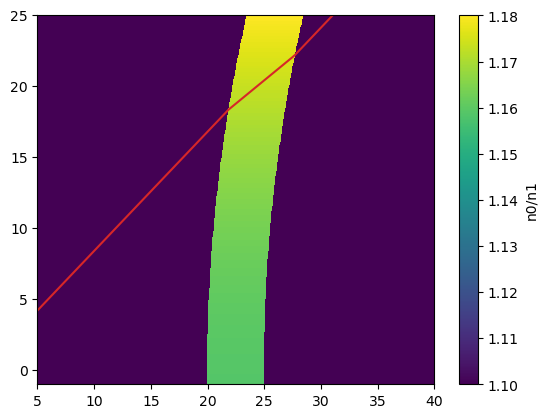

0.0 82.79052357676672


In [118]:
plt.pcolormesh(world_x, world_y, n, vmin = 1.1)
# plt.axvline(100,ls = ":")
# plt.axvline(120,ls = ":")
plt.colorbar(label = "n0/n1")
plt.plot(dx_points, tracky, "C3")
plt.xlim(5,40)
plt.ylim(-1,25)

plt.show()
print (tracky[0], tracky[-1])

In [119]:
theta_in = np.rad2deg(np.tan((tracky[100] - tracky[1]) / (dx_points[100] - dx_points[1])))
print (theta_in)
print (np.rad2deg(thetay[0]))

63.751522277951246
40.0


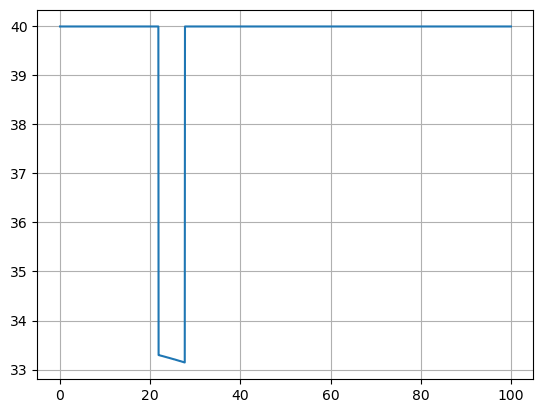

In [121]:
plt.plot(dx_points, np.rad2deg(thetay))
plt.grid()
# plt.axhline(30)

In [112]:
np.rad2deg(thetay[-1])

0.9999999999999998

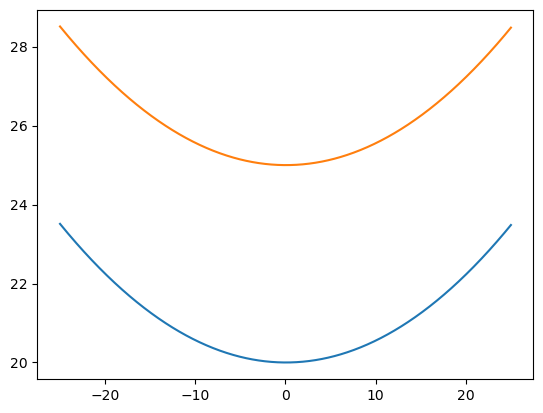

In [91]:
# Set up a Y gradient
params_tile = [20, -5.83882672e-04,  5.59534706e-03]

xmin = parabola(dy_points, *params_tile)
xmax = xmin + 5
# params = [1.15855784e+00, 0,  0]
plt.plot(dy_points, xmin)
plt.plot(dy_points, xmax)
plt.show()